# Streamlined framework of EDA for classification models

This project was designed to streamline the explorarory data analysis of common datasets that contained categorical, numeric and time-based data. The steps below focus on the common cleaning and feature engineering done on datasets to prep them for ML models. 

Since 70% of time taken in data science projects focus on EDA, this tries to recuce time by passing over the commmon steps taken. This was specifically not attuned to object-oriented programming as each cell has its own specific feature that needs to be monitored before continuing with the next step.     

### Concepts taken from: 

The Essential Toolbox for Data Cleaning  - https://towardsdatascience.com/the-simple-yet-practical-data-cleaning-codes-ad27c4ce0a38

Code snippets from CHRIS ALBON-
https://chrisalbon.com/


Data Cleaning with Python - https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

EDA for Feature Selection in ML - http://services.google.com/fh/files/misc/exploratory_data_analysis_for_feature_selection_in_machine_learning.pdf

Pythonic Data Cleaning With Pandas and NumPy - https://realpython.com/python-data-cleaning-numpy-pandas/

Tour of Evaluation Metrics for Imbalanced Classification - https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

A Starter Pack to EDA - https://towardsdatascience.com/a-starter-pack-to-exploratory-data-analysis-with-python-pandas-seaborn-and-scikit-learn-a77889485baf

## NOTE 
Some of the topics have been color coded so as to emphasize its use in the code

<span style="color:red">**RED**</span> - Warnings before using <p><p> 
<span style="color:blue">**BLUE**</span> - An option to choose from <p><p>
<span style="color:green">**GREEN**</span> - Experimental development - would like some insights <p><p>


## <span style="color:red">**IMPORTANT**</span>

Features  which require manual addtion of specific column variables are referenced as **col1** 

### Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import scipy.stats as ss

from datetime import date, time
from dateutil.parser import parse

from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

### Read the data [CSV]

#### Pandas has a lot more features for reading csv data 

pd.read_csv(*filepath_or_buffer*, *sep=’*, ‘, delimiter=None, header=’infer’, names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, *nrows=None*, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression=’infer’, thousands=None, decimal=b’.’, lineterminator=None, quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)

In [24]:
df= pd.read_csv('bank-additional-full.csv', sep=';',nrows=10000)

### Initial features

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(10000, 21)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10000 non-null  int64  
 1   job             10000 non-null  object 
 2   marital         10000 non-null  object 
 3   education       10000 non-null  object 
 4   default         10000 non-null  object 
 5   housing         10000 non-null  object 
 6   loan            10000 non-null  object 
 7   contact         10000 non-null  object 
 8   month           10000 non-null  object 
 9   day_of_week     10000 non-null  object 
 10  duration        10000 non-null  int64  
 11  campaign        10000 non-null  int64  
 12  pdays           10000 non-null  int64  
 13  previous        10000 non-null  int64  
 14  poutcome        10000 non-null  object 
 15  emp.var.rate    10000 non-null  float64
 16  cons.price.idx  10000 non-null  float64
 17  cons.conf.idx   10000 non-null  

In [118]:
# import plotly.figure_factory as ff
# figure = ff.create_scatterplotmatrix(df,diag='histogram')

In [8]:
#sns.pairplot(df)


### Find and drop duplicated values


<span style="color:red">**Check if the duplicated values mean anything significant**</span>

In [8]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No. of duplicated entries:  1
      age          job  marital education default housing loan    contact  \
1265   39  blue-collar  married  basic.6y      no      no   no  telephone   
1266   39  blue-collar  married  basic.6y      no      no   no  telephone   

     month day_of_week  duration  campaign  pdays  previous     poutcome  \
1265   may         thu       124         1    999         0  nonexistent   
1266   may         thu       124         1    999         0  nonexistent   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
1265           1.1          93.994          -36.4      4.855       5191.0  no  
1266           1.1          93.994          -36.4      4.855       5191.0  no  


In [9]:
#Drop the duplicate
df.drop_duplicates(inplace=True)

### Null values

In [10]:
df.isnull().sum().sort_values(ascending=False)

y                 0
day_of_week       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
age               0
dtype: int64

### In-depth analysis on missing values

In [9]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

age - 0.0%
job - 0.0%
marital - 0.0%
education - 0.0%
default - 0.0%
housing - 0.0%
loan - 0.0%
contact - 0.0%
month - 0.0%
day_of_week - 0.0%
duration - 0.0%
campaign - 0.0%
pdays - 0.0%
previous - 0.0%
poutcome - 0.0%
emp.var.rate - 0.0%
cons.price.idx - 0.0%
cons.conf.idx - 0.0%
euribor3m - 0.0%
nr.employed - 0.0%
y - 0.0%


### Working on missing values

#### <span style="color:blue">**(1) Drop Missing Rows**</span> 

In [ ]:
# drop rows with a lot of missing values.
ind_missing = df[df['col1'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

#### <span style="color:blue">**(2) Drop Missing Feature**</span> 

In [ ]:
# drop the feature entirely
cols_to_drop = ['col1']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)

#### <span style="color:green">**Imputation is done later when we have a better idea about the numeric data**</span> 

### Seperate the target variable

In [27]:
target = df['y']
df.drop(labels=['y'], axis=1,inplace = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


### <span style="color:green">**Check if the target variable needs to be encoded.**</span> 

In [12]:
le = LabelEncoder()
target = le.fit_transform(target)
target[:5]

array([0, 0, 0, 0, 0])

### General Statistical Insights

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9999 non-null   int64  
 1   job             9999 non-null   object 
 2   marital         9999 non-null   object 
 3   education       9999 non-null   object 
 4   default         9999 non-null   object 
 5   housing         9999 non-null   object 
 6   loan            9999 non-null   object 
 7   contact         9999 non-null   object 
 8   month           9999 non-null   object 
 9   day_of_week     9999 non-null   object 
 10  duration        9999 non-null   int64  
 11  campaign        9999 non-null   int64  
 12  pdays           9999 non-null   int64  
 13  previous        9999 non-null   int64  
 14  poutcome        9999 non-null   object 
 15  emp.var.rate    9999 non-null   float64
 16  cons.price.idx  9999 non-null   float64
 17  cons.conf.idx   9999 non-null   f

In [14]:
df.shape

(9999, 20)

In [15]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

<span style="color:green">**Check for imbalances in the classifiers**</span>

Each method is applicable based on the dataset.
Taken from The Machine Learning Mastery website - Evaluation Metrics for Imbalanced Classification


<ul>
<li><strong>Are you predicting probabilities?</strong>
<ul>
<li><strong>Do you need class labels?</strong>
<ul>
<li><strong>Is the positive class more important?</strong>
<ul>
<li>Use Precision-Recall AUC</li>
</ul>
</li>
<li><strong>Are both classes important?</strong>
<ul>
<li>Use ROC AUC</li>
</ul>
</li>
</ul>
</li>
<li><strong>Do you need probabilities?</strong>
<ul>
<li>Use Brier Score and Brier Skill Score</li>
</ul>
</li>
</ul>
</li>
<li><strong>Are you predicting class labels?</strong>
<ul>
<li><strong>Is the positive class more important?</strong>
<ul>
<li><strong>Are False Negatives and False Positives Equally Important?</strong>
<ul>
<li>Use F1-Measure</li>
</ul>
</li>
<li><strong>Are False Negatives More Important?</strong>
<ul>
<li>Use F2-Measure</li>
</ul>
</li>
<li><strong>Are False Positives More Important?</strong>
<ul>
<li>Use F0.5-Measure</li>
</ul>
</li>
</ul>
</li>
<li><strong>Are both classes important?</strong>
<ul>
<li><strong>Do you have &lt; 80%-90% Examples for the Majority Class?&nbsp;</strong>
<ul>
<li>Use Accuracy</li>
</ul>
</li>
<li><strong>Do you have &gt; 80%-90% Examples for the Majority Class?&nbsp;</strong>
<ul>
<li>Use G-Mean</li>
</ul>
</li>
</ul>
</li>
</ul>
</li>
</ul>

### Column-wise analysis

In [19]:
unique_values= df.nunique()
unique_values

age                 42
job                 12
marital              4
education            8
default              2
housing              3
loan                 3
contact              1
month                2
day_of_week          5
duration          1074
campaign            35
pdays                1
previous             1
poutcome             1
emp.var.rate         2
cons.price.idx       2
cons.conf.idx        2
euribor3m           12
nr.employed          2
dtype: int64

Checks for columns with varying data values

In [20]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct < 0.75 and top_pct > 0.20:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

job: 29.79298%
blue-collar      2979
admin.           2073
technician       1365
services         1172
management        678
entrepreneur      381
self-employed     340
housemaid         297
retired           273
unemployed        236
unknown           125
student            80
Name: job, dtype: int64

marital: 67.16672%
married     6716
single      2149
divorced    1117
unknown       17
Name: marital, dtype: int64

education: 23.82238%
high.school            2382
university.degree      2109
basic.9y               1820
basic.4y               1299
professional.course    1142
basic.6y                760
unknown                 485
illiterate                2
Name: education, dtype: int64

default: 68.30683%
no         6830
unknown    3169
Name: default, dtype: int64

housing: 51.87519%
no         5187
yes        4524
unknown     288
Name: housing, dtype: int64

day_of_week: 21.72217%
wed    2172
tue    2065
mon    2053
fri    2052
thu    1657
Name: day_of_week, dtype: int64

campaign: 39

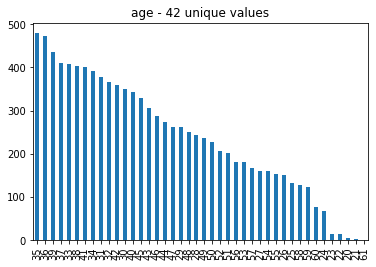

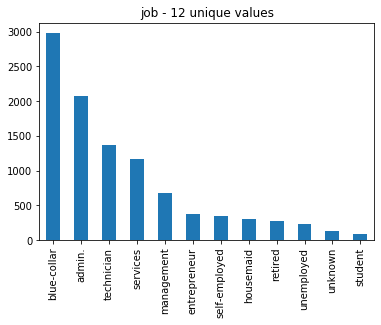

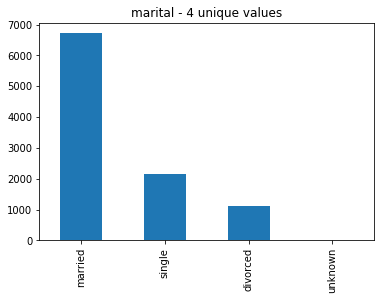

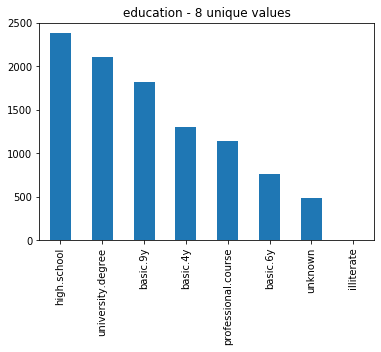

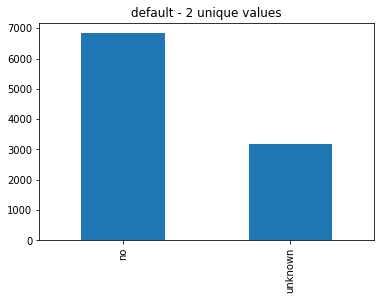

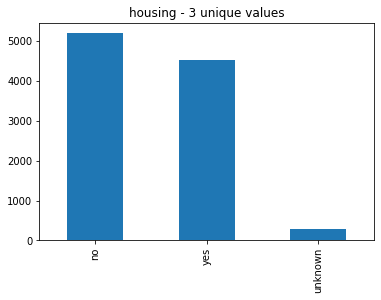

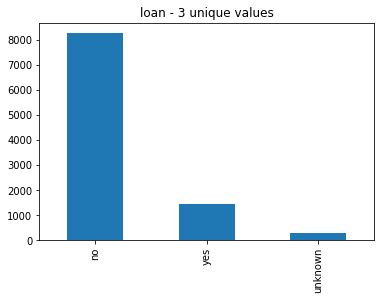

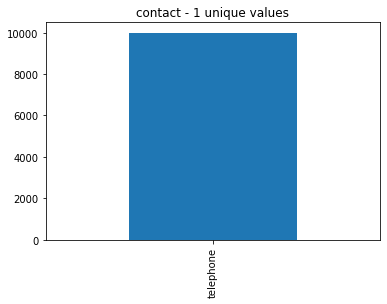

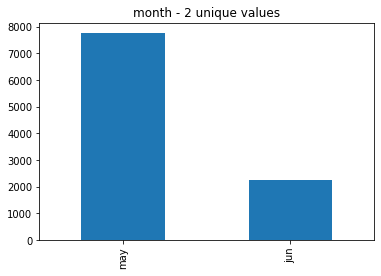

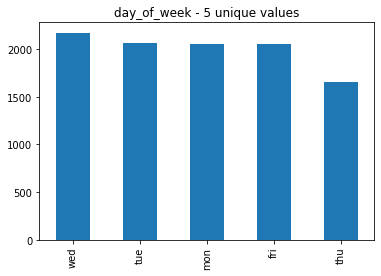

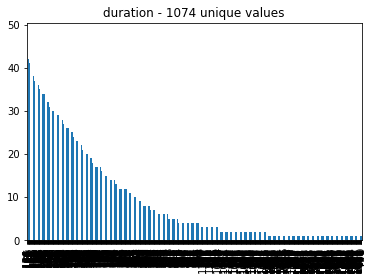

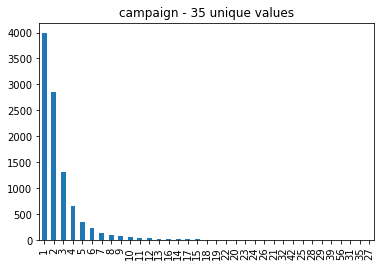

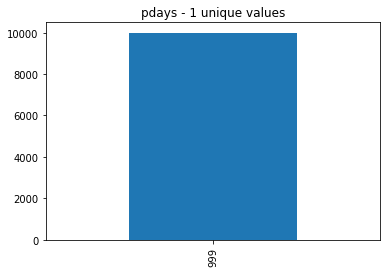

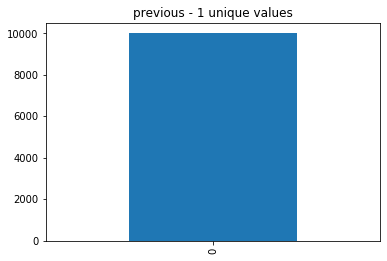

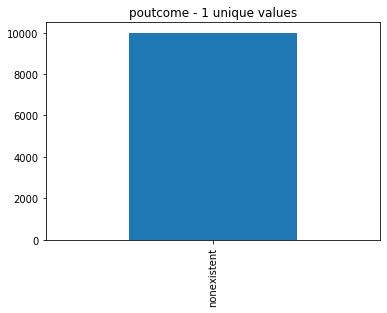

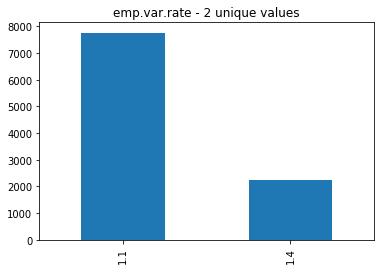

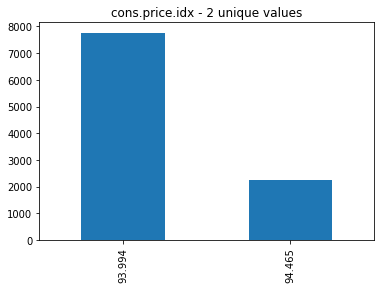

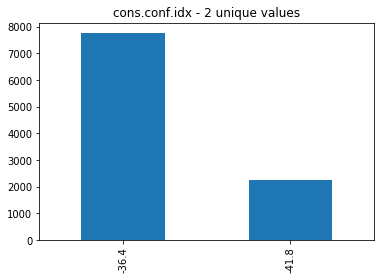

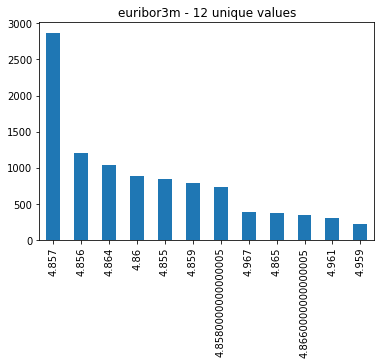

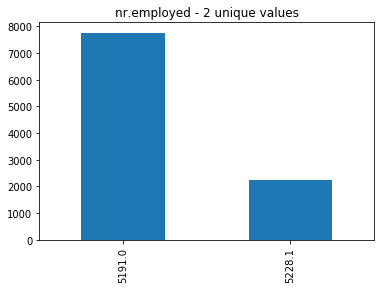

In [21]:
#plot for unique analysis
for i in df.columns:
    plt.figure()
    plt.title(f'{i} - {unique_values[i]} unique values')
    values=pd.value_counts(df[i]).plot.bar()   

### Change the index of the dataframe as a unique column

In [22]:
# Find columns with unique values
unique_columns =[index for  index,values in unique_values.items() if values==len(df) ]
print(f'{unique_columns if unique_columns !=[] else None}')

None


In [ ]:
df.set_index('col1',inplace=True)
df.head()

### Convert numeric to categorical

Sometimes categorical values are denoted as numeric (0 and 1). It is better to label them as categorical before splitting.

In [128]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [38]:
to_categorical=["col1"]
df[to_categorical].astype(cat_dtype)

### Overview of summary based on the target variable

In [23]:
grouped_values = df.groupby(target)
grouped_summary=grouped_values.mean()
grouped_summary

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,40.290947,238.242007,2.615830,999.0,0.0,1.166518,94.098434,-37.597331,4.868214,5199.226105
1,39.865269,922.883234,2.547904,999.0,0.0,1.184431,94.126557,-37.919760,4.870545,5201.441317


### Rename columns if needed

In [ ]:
replace_columns={'col1':'New_col1'}
df.rename(columns=replace_columns)
df.head()

### Drop the target variable from the dataframe

Since we have a target stored as a variable, it is better to seperate it from the rest of the dataframe

In [33]:
df.drop(columns=target.name,inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


### Get numeric and categorical features

NOTE: Categorical features will also contain timestamps as there may be a chance that it exists as a string datatype

In [129]:
df_numeric=df.select_dtypes(include=['float64', 'int64'])
df_categorical=df.select_dtypes(exclude=['float64', 'int64'])

## Categorical Data

### Remove extra white space in text columns

In [35]:
for col in df_categorical.columns:
    df_categorical[col] = df_categorical[col].str.strip()

### Bar plot of categorical features

In [41]:
df_categorical.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [37]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          10000 non-null  object
 1   marital      10000 non-null  object
 2   education    10000 non-null  object
 3   default      10000 non-null  object
 4   housing      10000 non-null  object
 5   loan         10000 non-null  object
 6   contact      10000 non-null  object
 7   month        10000 non-null  object
 8   day_of_week  10000 non-null  object
 9   poutcome     10000 non-null  object
dtypes: object(10)
memory usage: 781.4+ KB


In [130]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print ('\t', column_interested)
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()
    print('\n'*2)

### Univariate analysis

	 job
count            9999
unique             12
top       blue-collar
freq             2979
Name: job, dtype: object
mode:  0    blue-collar
dtype: object
blue-collar      2979
admin.           2073
technician       1365
services         1172
management        678
entrepreneur      381
self-employed     340
housemaid         297
retired           273
unemployed        236
unknown           125
student            80
Name: job, dtype: int64


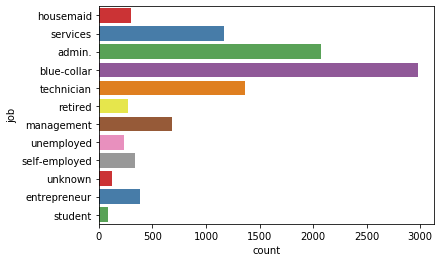




	 marital
count        9999
unique          4
top       married
freq         6716
Name: marital, dtype: object
mode:  0    married
dtype: object
married     6716
single      2149
divorced    1117
unknown       17
Name: marital, dtype: int64


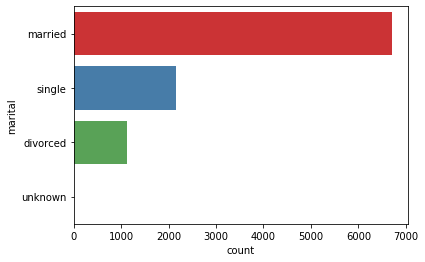




	 education
count            9999
unique              8
top       high.school
freq             2382
Name: education, dtype: object
mode:  0    high.school
dtype: object
high.school            2382
university.degree      2109
basic.9y               1820
basic.4y               1299
professional.course    1142
basic.6y                760
unknown                 485
illiterate                2
Name: education, dtype: int64


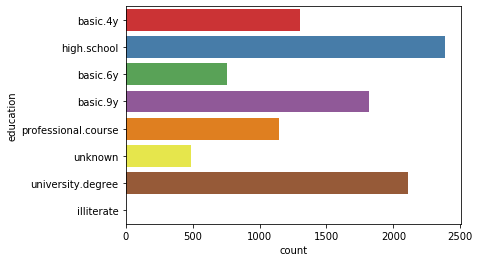




	 default
count     9999
unique       2
top         no
freq      6830
Name: default, dtype: object
mode:  0    no
dtype: object
no         6830
unknown    3169
Name: default, dtype: int64


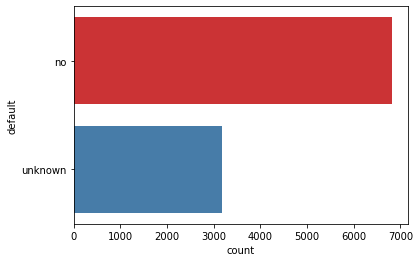




	 housing
count     9999
unique       3
top         no
freq      5187
Name: housing, dtype: object
mode:  0    no
dtype: object
no         5187
yes        4524
unknown     288
Name: housing, dtype: int64


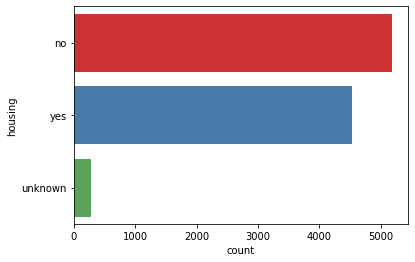




	 loan
count     9999
unique       3
top         no
freq      8261
Name: loan, dtype: object
mode:  0    no
dtype: object
no         8261
yes        1450
unknown     288
Name: loan, dtype: int64


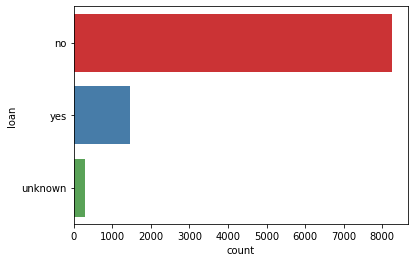




	 contact
count          9999
unique            1
top       telephone
freq           9999
Name: contact, dtype: object
mode:  0    telephone
dtype: object
telephone    9999
Name: contact, dtype: int64


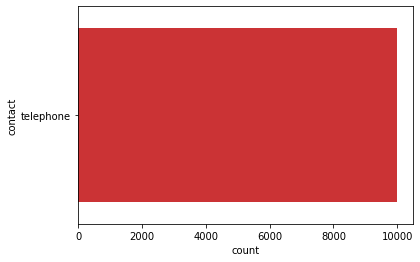




	 month
count     9999
unique       2
top        may
freq      7762
Name: month, dtype: object
mode:  0    may
dtype: object
may    7762
jun    2237
Name: month, dtype: int64


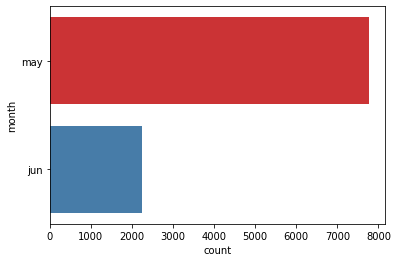




	 day_of_week
count     9999
unique       5
top        wed
freq      2172
Name: day_of_week, dtype: object
mode:  0    wed
dtype: object
wed    2172
tue    2065
mon    2053
fri    2052
thu    1657
Name: day_of_week, dtype: int64


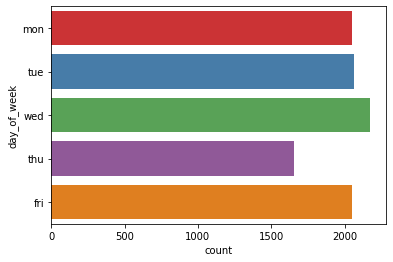




	 poutcome
count            9999
unique              1
top       nonexistent
freq             9999
Name: poutcome, dtype: object
mode:  0    nonexistent
dtype: object
nonexistent    9999
Name: poutcome, dtype: int64


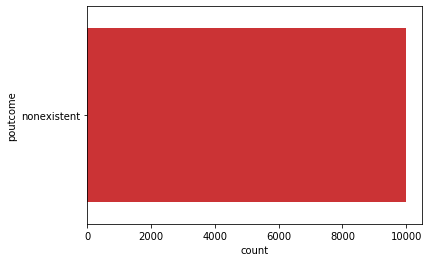




	 y
count     9999
unique       2
top         no
freq      9665
Name: y, dtype: object
mode:  0    no
dtype: object
no     9665
yes     334
Name: y, dtype: int64


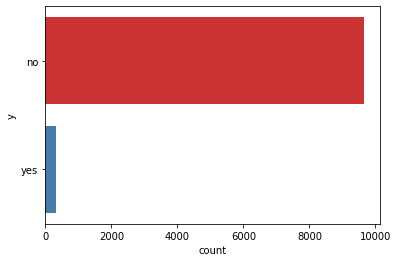

In [131]:
for col in df_categorical.columns:
    categorical_summarized(df_categorical,y=col)

### Bivariate analysis

	 job
count           10000
unique             12
top       blue-collar
freq             2980
Name: job, dtype: object
mode:  0    blue-collar
dtype: object
blue-collar      2980
admin.           2073
technician       1365
services         1172
management        678
entrepreneur      381
self-employed     340
housemaid         297
retired           273
unemployed        236
unknown           125
student            80
Name: job, dtype: int64


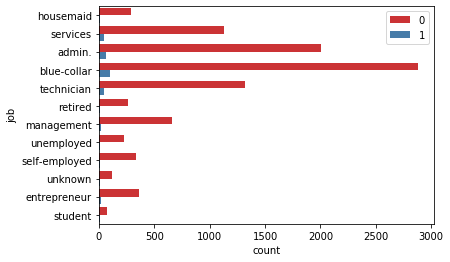




	 marital
count       10000
unique          4
top       married
freq         6717
Name: marital, dtype: object
mode:  0    married
dtype: object
married     6717
single      2149
divorced    1117
unknown       17
Name: marital, dtype: int64


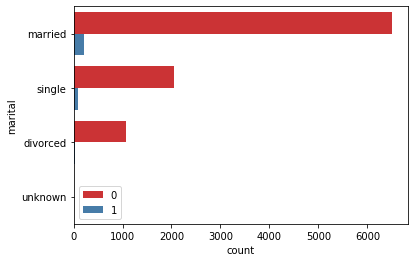




	 education
count           10000
unique              8
top       high.school
freq             2382
Name: education, dtype: object
mode:  0    high.school
dtype: object
high.school            2382
university.degree      2109
basic.9y               1820
basic.4y               1299
professional.course    1142
basic.6y                761
unknown                 485
illiterate                2
Name: education, dtype: int64


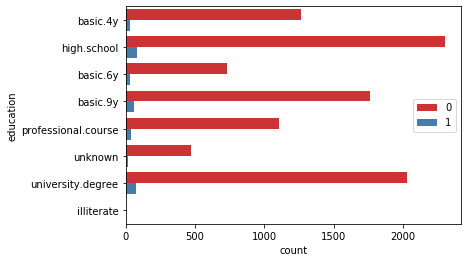




	 default
count     10000
unique        2
top          no
freq       6831
Name: default, dtype: object
mode:  0    no
dtype: object
no         6831
unknown    3169
Name: default, dtype: int64


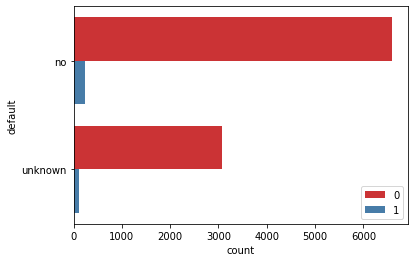




	 housing
count     10000
unique        3
top          no
freq       5188
Name: housing, dtype: object
mode:  0    no
dtype: object
no         5188
yes        4524
unknown     288
Name: housing, dtype: int64


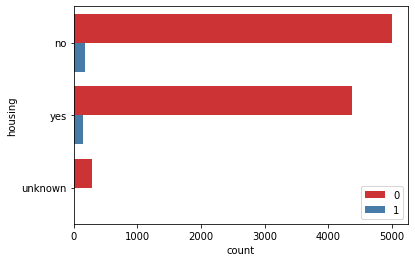




	 loan
count     10000
unique        3
top          no
freq       8262
Name: loan, dtype: object
mode:  0    no
dtype: object
no         8262
yes        1450
unknown     288
Name: loan, dtype: int64


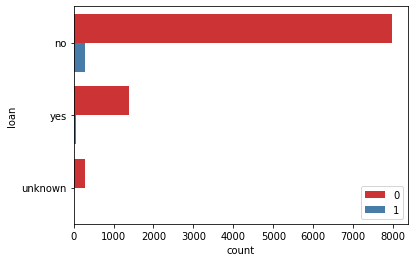




	 contact
count         10000
unique            1
top       telephone
freq          10000
Name: contact, dtype: object
mode:  0    telephone
dtype: object
telephone    10000
Name: contact, dtype: int64


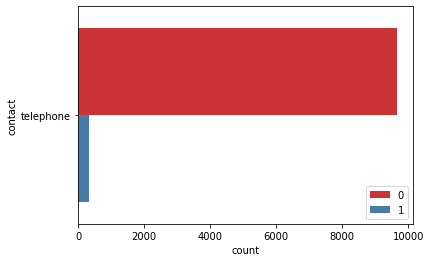




	 month
count     10000
unique        2
top         may
freq       7763
Name: month, dtype: object
mode:  0    may
dtype: object
may    7763
jun    2237
Name: month, dtype: int64


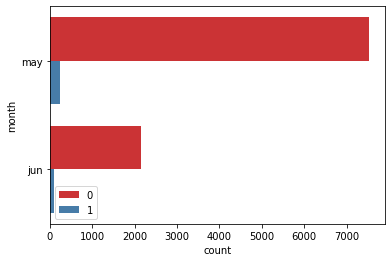




	 day_of_week
count     10000
unique        5
top         wed
freq       2172
Name: day_of_week, dtype: object
mode:  0    wed
dtype: object
wed    2172
tue    2065
mon    2053
fri    2052
thu    1658
Name: day_of_week, dtype: int64


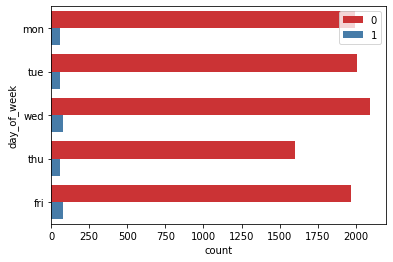




	 poutcome
count           10000
unique              1
top       nonexistent
freq            10000
Name: poutcome, dtype: object
mode:  0    nonexistent
dtype: object
nonexistent    10000
Name: poutcome, dtype: int64


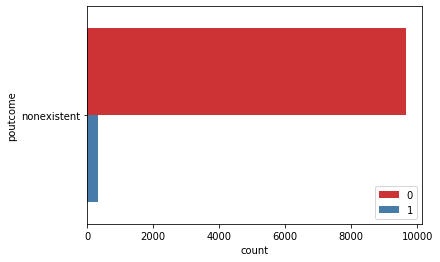

In [54]:
for col in df_categorical.columns:
    categorical_summarized(df_categorical,y=col,hue=target)

#### Impute missing categorical values with mode

In [ ]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
non_numeric_cols = df_categorical.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

## Chi square analysis

Tests for independence of categorical variables. Requires all categorical variables to be **label encoded** before analysis

In [64]:
chi_square = df_categorical.apply(LabelEncoder().fit_transform)
chi_scores = chi2(chi_square,target)
chi_scores

(array([0.75649527, 1.53209061, 0.42232295, 0.00697247, 0.54548717,
        0.02125897,        nan, 1.48381723, 0.41220745,        nan]),
 array([0.38442755, 0.21579895, 0.51578021, 0.93345293, 0.46016752,
        0.88407567,        nan, 0.22317823, 0.52085121,        nan]))

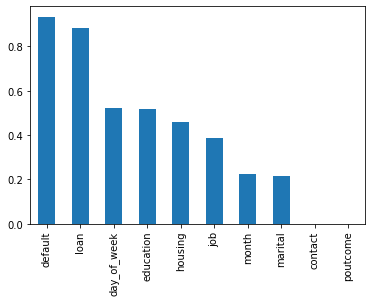

In [65]:
p_values = pd.Series(chi_scores[1],index = chi_square.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

### Encoding categorical data

<span style="color:red">**Choose relevant features and encoding methods**</span>

#### <span style="color:blue">** (1) Label Encoder **</span> 

In [ ]:
le = LabelEncoder()
le.fit(df_categorical['col1'])         
le.transform(df_categorical['col1'])         # Convert to Integer values

## Add to df_categorical
df_categorical.replace(le, inplace=True) 
df_categorical.head()

#### <span style="color:blue">** (2) Label Encoder with Weights  **</span> 

In [ ]:
num_encode = {'col1' : {'YES':1, 'NO':0},
              'col1'  : {'WON':1, 'LOSE':0, 'DRAW':0}}  
df_categorical.replace(num_encode, inplace=True)  

#### <span style="color:blue">** (3) One Hot Encoder  **</span> 

In [ ]:
one_hot_variables=['col1','col2']
one_hot_encode=pd.get_dummies(data=df_categorical, columns=one_hot_variables,dummy_na=True)
#df_categorical.drop([one_hot_variables])
df_categorical=pd.concat([df_categorical, one_hot_encode], axis=1)

### Date-Time data 

<span style="color:red">**Make sure that the data related to time is a relevant feature (Classification models cannot use datetime variables)**</span>

#### Convert timestamp(from string to datetime format)

In [ ]:
df_categorical['timestamp']=pd.to_datetime(df_categorical['col'], format='%Y-%m-%d %H:%M:%S.%f'))

#### Pull Day, month year if the timestamp is a string

In [ ]:
df['date'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df_categorical['year'] = df_categorical['date'].dt.year
df_categorical['month'] = df_categorical['date'].dt.month
df_categorical['day'] = df_categorical['date'].dt.day
df['weekday'] = df['timestamp_dt'].dt.weekday

In [ ]:
df_categorical['hour'] = df_categorical['date'].dt.hour
df_categorical['minute'] = df_categorical['date'].dt.minute

#### Show Days Of The Week

In [ ]:
df_categorical['weekday'] = df_categorical.date.weekday()

#### Difference between two dates

In [ ]:
df_categorical['date_difference']=abs((d2 - d1).days)

#### Drop the orginal timestamp columns

In [ ]:
del(df_categorical['col1'])

## Numeric data

### Univariate analysis

### Histogram of numeric features

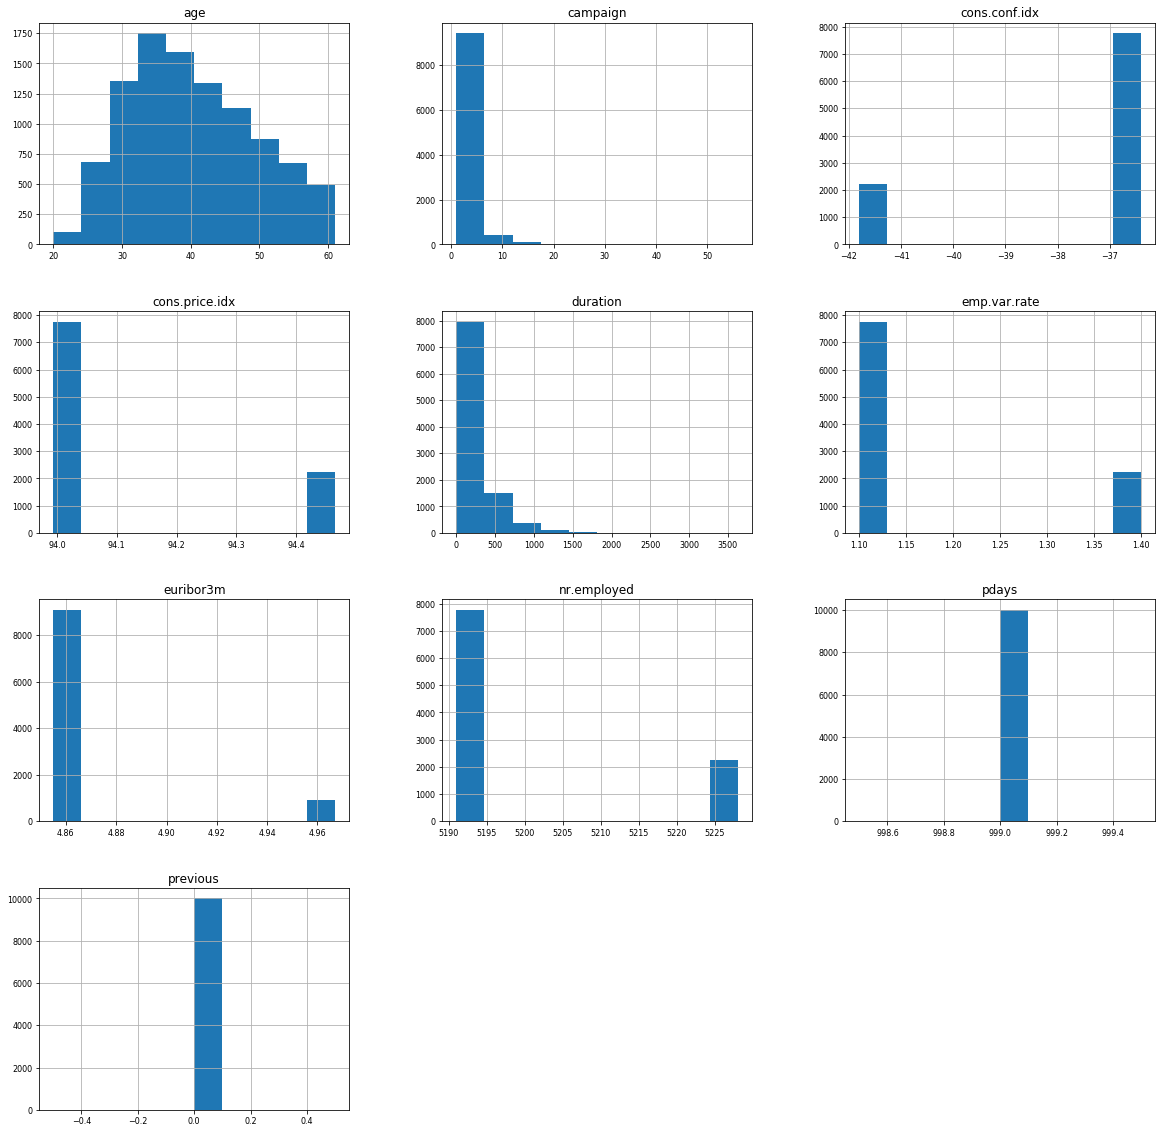

In [71]:
df_numeric.hist(figsize=(20, 20), bins=10, xlabelsize=8, ylabelsize=8);

### General Statistical Insights

In [78]:
def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, verbose=True, swarm=False):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    print ('\t', y)
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax,)

    if swarm:
        sns.swarmplot(x=x, y=y, hue=hue, data=dataframe,
                      palette=palette, ax=ax)

    plt.show()
    print('\n'*2)

### Univariate numeric analysis

	 age
count    10000.000000
mean        40.276600
std          8.881767
min         20.000000
25%         33.000000
50%         39.000000
75%         47.000000
max         61.000000
Name: age, dtype: float64
mode:  0    35
dtype: int64
35    480
36    472
39    438
37    411
33    408
38    403
41    401
34    391
31    378
32    366
42    360
30    349
40    344
45    329
43    306
46    287
44    273
47    262
29    262
48    251
28    243
49    237
50    228
52    206
51    201
56    182
53    181
57    167
27    160
54    159
55    153
26    150
25    133
58    128
59    122
60     76
24     67
23     15
22     13
20      4
21      3
61      1
Name: age, dtype: int64


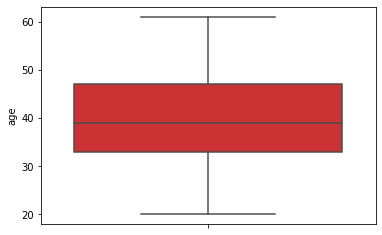




	 duration
count    10000.000000
mean       261.097600
std        247.559515
min          0.000000
25%        113.000000
50%        190.000000
75%        322.000000
max       3631.000000
Name: duration, dtype: float64
mode:  0    136
dtype: int64
136     48
166     47
125     42
160     42
135     42
139     42
85      42
100     41
83      41
147     41
122     41
152     41
123     41
140     40
159     40
144     40
198     39
178     39
109     39
107     38
95      38
112     38
162     38
70      37
114     37
174     37
180     37
129     37
134     37
124     36
92      36
91      36
189     36
181     36
87      36
128     36
179     36
127     36
71      36
165     35
93      35
76      35
118     35
145     35
102     35
103     35
97      35
175     35
111     34
106     34
81      34
72      34
164     34
73      34
126     34
148     34
78      34
230     34
211     33
143     33
202     33
193     33
184     33
110     33
172     32
117     32
59      32
188     32
19

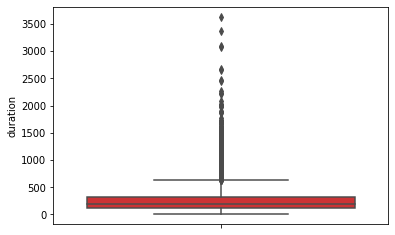




	 campaign
count    10000.000000
mean         2.613400
std          2.839885
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64
mode:  0    1
dtype: int64
1     3993
2     2858
3     1307
4      661
5      355
6      231
7      138
8       88
9       77
10      64
11      41
12      34
13      27
16      19
14      16
17      16
15      14
18      10
19       7
22       6
20       5
23       5
24       4
26       4
21       4
32       3
42       2
25       2
28       2
29       2
39       1
56       1
31       1
35       1
27       1
Name: campaign, dtype: int64


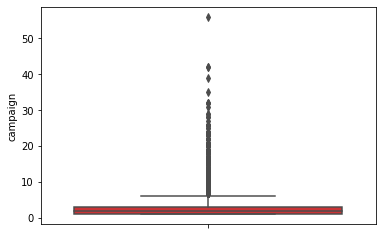




	 pdays
count    10000.0
mean       999.0
std          0.0
min        999.0
25%        999.0
50%        999.0
75%        999.0
max        999.0
Name: pdays, dtype: float64
mode:  0    999
dtype: int64
999    10000
Name: pdays, dtype: int64


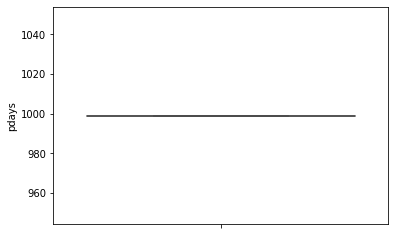




	 previous
count    10000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: previous, dtype: float64
mode:  0    0
dtype: int64
0    10000
Name: previous, dtype: int64


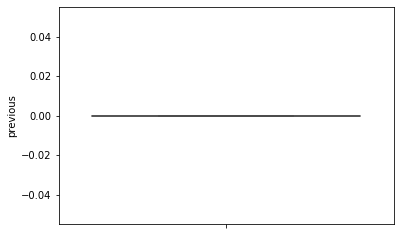




	 emp.var.rate
count    10000.000000
mean         1.167110
std          0.125023
min          1.100000
25%          1.100000
50%          1.100000
75%          1.100000
max          1.400000
Name: emp.var.rate, dtype: float64
mode:  0    1.1
dtype: float64
1.1    7763
1.4    2237
Name: emp.var.rate, dtype: int64


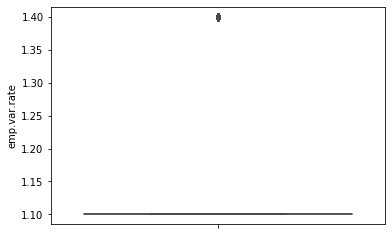




	 cons.price.idx
count    10000.000000
mean        94.099363
std          0.196286
min         93.994000
25%         93.994000
50%         93.994000
75%         93.994000
max         94.465000
Name: cons.price.idx, dtype: float64
mode:  0    93.994
dtype: float64
93.994    7763
94.465    2237
Name: cons.price.idx, dtype: int64


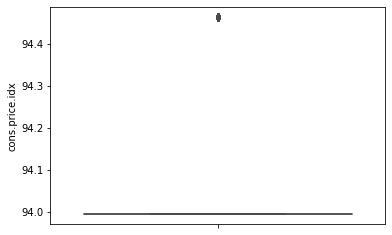




	 cons.conf.idx
count    10000.000000
mean       -37.607980
std          2.250418
min        -41.800000
25%        -36.400000
50%        -36.400000
75%        -36.400000
max        -36.400000
Name: cons.conf.idx, dtype: float64
mode:  0   -36.4
dtype: float64
-36.4    7763
-41.8    2237
Name: cons.conf.idx, dtype: int64


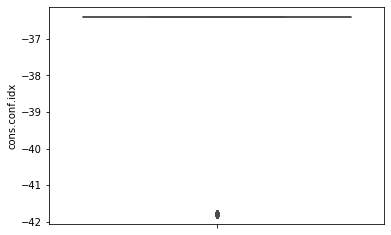




	 euribor3m
count    10000.000000
mean         4.868291
std          0.030326
min          4.855000
25%          4.857000
50%          4.858000
75%          4.864000
max          4.967000
Name: euribor3m, dtype: float64
mode:  0    4.857
dtype: float64
4.857    2868
4.856    1210
4.864    1044
4.860     885
4.855     840
4.859     788
4.858     733
4.967     391
4.865     373
4.866     340
4.961     308
4.959     220
Name: euribor3m, dtype: int64


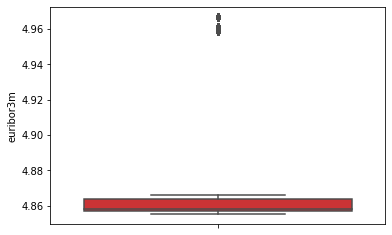




	 nr.employed
count    10000.000000
mean      5199.299270
std         15.461208
min       5191.000000
25%       5191.000000
50%       5191.000000
75%       5191.000000
max       5228.100000
Name: nr.employed, dtype: float64
mode:  0    5191.0
dtype: float64
5191.0    7763
5228.1    2237
Name: nr.employed, dtype: int64


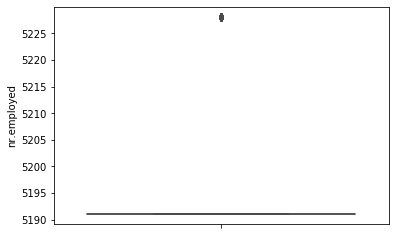

In [79]:
for col in df_numeric.columns:
    quantitative_summarized(df_numeric,y=col)

### Bivariate numeric analysis

	 age
count    10000.000000
mean        40.276600
std          8.881767
min         20.000000
25%         33.000000
50%         39.000000
75%         47.000000
max         61.000000
Name: age, dtype: float64
mode:  0    35
dtype: int64


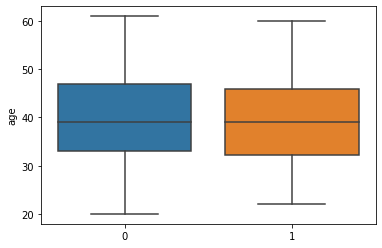




	 duration
count    10000.000000
mean       261.097600
std        247.559515
min          0.000000
25%        113.000000
50%        190.000000
75%        322.000000
max       3631.000000
Name: duration, dtype: float64
mode:  0    136
dtype: int64


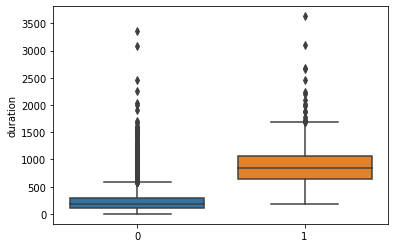




	 campaign
count    10000.000000
mean         2.613400
std          2.839885
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64
mode:  0    1
dtype: int64


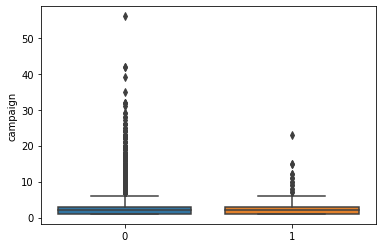




	 pdays
count    10000.0
mean       999.0
std          0.0
min        999.0
25%        999.0
50%        999.0
75%        999.0
max        999.0
Name: pdays, dtype: float64
mode:  0    999
dtype: int64


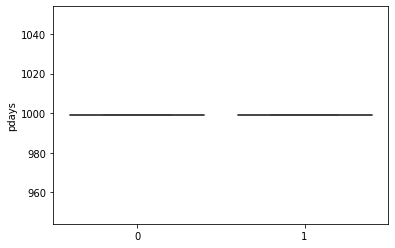




	 previous
count    10000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: previous, dtype: float64
mode:  0    0
dtype: int64


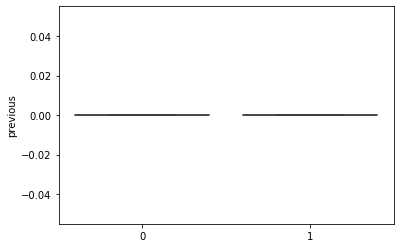




	 emp.var.rate
count    10000.000000
mean         1.167110
std          0.125023
min          1.100000
25%          1.100000
50%          1.100000
75%          1.100000
max          1.400000
Name: emp.var.rate, dtype: float64
mode:  0    1.1
dtype: float64


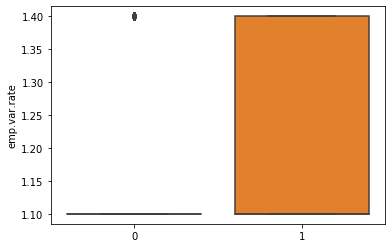




	 cons.price.idx
count    10000.000000
mean        94.099363
std          0.196286
min         93.994000
25%         93.994000
50%         93.994000
75%         93.994000
max         94.465000
Name: cons.price.idx, dtype: float64
mode:  0    93.994
dtype: float64


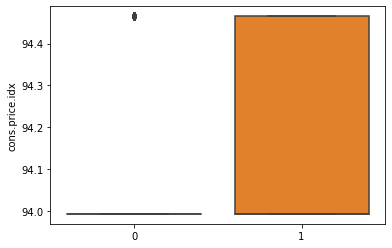




	 cons.conf.idx
count    10000.000000
mean       -37.607980
std          2.250418
min        -41.800000
25%        -36.400000
50%        -36.400000
75%        -36.400000
max        -36.400000
Name: cons.conf.idx, dtype: float64
mode:  0   -36.4
dtype: float64


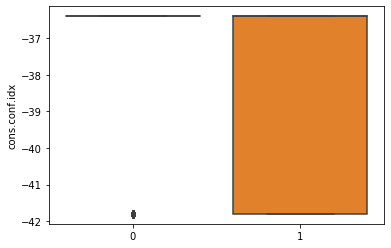




	 euribor3m
count    10000.000000
mean         4.868291
std          0.030326
min          4.855000
25%          4.857000
50%          4.858000
75%          4.864000
max          4.967000
Name: euribor3m, dtype: float64
mode:  0    4.857
dtype: float64


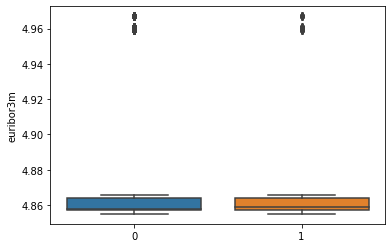




	 nr.employed
count    10000.000000
mean      5199.299270
std         15.461208
min       5191.000000
25%       5191.000000
50%       5191.000000
75%       5191.000000
max       5228.100000
Name: nr.employed, dtype: float64
mode:  0    5191.0
dtype: float64


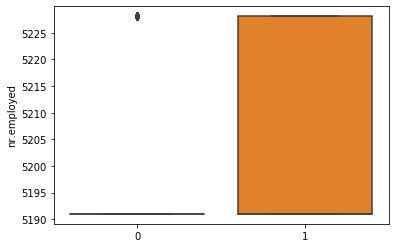

In [80]:
for col in df_numeric.columns:
    quantitative_summarized(dataframe= df_numeric, y = col, x = target, palette=c_palette, verbose=False)

In [74]:
df_numeric = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) |(df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
df_numeric.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


### Multivariate numeric analysis

Use to see which 2 columns that sould be analyzed based on target column

	 campaign
count    10000.000000
mean         2.613400
std          2.839885
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64
mode:  0    1
dtype: int64


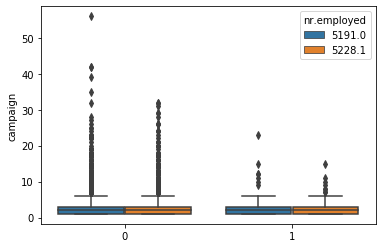

In [81]:
quantitative_summarized(dataframe= df_numeric, y = 'campaign', x = target, hue = 'nr.employed', palette=c_palette, verbose=False, swarm=False)

### Handling outliers 

In [69]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                14.000
duration          209.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        0.000
cons.price.idx      0.000
cons.conf.idx       0.000
euribor3m           0.007
nr.employed         0.000
dtype: float64


In [98]:
df_numeric_outliers = df_numeric[((df_numeric < (Q1 - 1.5 * IQR)) |(df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
df_numeric_outliers

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
37,52,1666,1,999,0,1.1,93.994,-36.4,4.857,5191.0
57,45,787,1,999,0,1.1,93.994,-36.4,4.857,5191.0
61,51,812,1,999,0,1.1,93.994,-36.4,4.857,5191.0
75,41,1575,1,999,0,1.1,93.994,-36.4,4.857,5191.0
83,49,1042,1,999,0,1.1,93.994,-36.4,4.857,5191.0
88,49,1467,1,999,0,1.1,93.994,-36.4,4.857,5191.0
111,58,849,2,999,0,1.1,93.994,-36.4,4.857,5191.0
131,41,677,1,999,0,1.1,93.994,-36.4,4.857,5191.0
164,39,2033,1,999,0,1.1,93.994,-36.4,4.857,5191.0
169,54,843,2,999,0,1.1,93.994,-36.4,4.857,5191.0


In [99]:
df_numeric = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) |(df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
df_numeric.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


### Dataframe after eliminating outliers

In [61]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10000 non-null  int64  
 1   duration        10000 non-null  int64  
 2   campaign        10000 non-null  int64  
 3   pdays           10000 non-null  int64  
 4   previous        10000 non-null  int64  
 5   emp.var.rate    10000 non-null  float64
 6   cons.price.idx  10000 non-null  float64
 7   cons.conf.idx   10000 non-null  float64
 8   euribor3m       10000 non-null  float64
 9   nr.employed     10000 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 781.4 KB


In [93]:
df_numeric.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,40.276600,261.097600,2.613400,999.0,0.0,1.167110,94.099363,-37.607980,4.868291,5199.299270
std,8.881767,247.559515,2.839885,0.0,0.0,0.125023,0.196286,2.250418,0.030326,15.461208
min,20.000000,0.000000,1.000000,999.0,0.0,1.100000,93.994000,-41.800000,4.855000,5191.000000
25%,33.000000,113.000000,1.000000,999.0,0.0,1.100000,93.994000,-36.400000,4.857000,5191.000000
50%,39.000000,190.000000,2.000000,999.0,0.0,1.100000,93.994000,-36.400000,4.858000,5191.000000
75%,47.000000,322.000000,3.000000,999.0,0.0,1.100000,93.994000,-36.400000,4.864000,5191.000000
max,61.000000,3631.000000,56.000000,999.0,0.0,1.400000,94.465000,-36.400000,4.967000,5228.100000


### Skewedness and Kurtosis distributions

### Skewedness

* If skewness is less than −1 or greater than +1, the distribution is highly skewed.
* If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
* If skewness is between −½ and +½, the distribution is approximately symmetric.

### Kurtosis 

* A normal distribution has kurtosis exactly 3 (excess kurtosis exactly 0). Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic.
* A distribution with kurtosis <3 (excess kurtosis <0) is called platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.
* A distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.

In [62]:
df_numeric_orientation = pd.DataFrame({"Skewedness":df_numeric.skew(),"Kurtosis":df_numeric.kurt()})
df_numeric_orientation

,Skewedness,Kurtosis
age,0.319574,-0.741044
duration,3.251156,19.559174
campaign,5.031879,43.534259
pdays,0.000000,0.000000
previous,0.000000,0.000000
emp.var.rate,1.326259,-0.241086
cons.price.idx,1.326259,-0.241086
cons.conf.idx,-1.326259,-0.241086
euribor3m,2.780819,5.859925
nr.employed,1.326259,-0.241086


### Reduce memory load by converting to 32-bits

<span style="color:red">**Confirm that the data values do not matter when downsizing**</span>

In [63]:
df_numeric.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [66]:
# Change the dtypes (int64 -> int32)
df_numeric[['col1']] = df_numeric[['col1']].astype('int32')

# Change the dtypes (float64 -> float32)
df_numeric[['col1']] = df_numeric[['col1']].astype('float32')

### Impute all missing numeric data with Median 


In [82]:
# impute the missing values and create the missing value indicator variables for each numeric column.
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df_numeric[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print(f'imputing missing values for: {col} - Missing {num_missing} values')

        med = df_numeric[col].median()
        df_numeric[col] = df_numeric[col].fillna(med)

print("All collumns checked") 

All collumns checked


### Find qunatiles for each numeric value 

In [85]:
quantile_check=df_numeric.quantile([.1, .25, .5, .75], axis = 0)
quantile_check

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0.10,29.0,66.0,1.0,999.0,0.0,1.1,93.994,-41.8,4.856,5191.0
0.25,33.0,113.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
0.50,39.0,190.0,2.0,999.0,0.0,1.1,93.994,-36.4,4.858,5191.0
0.75,47.0,322.0,3.0,999.0,0.0,1.1,93.994,-36.4,4.864,5191.0


### Normalize Numeric features

#### MinMax Scaler

In [ ]:
cols=['col1']
scaled_variables = df_numeric[cols].values.astype(float)
min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(scaled_variables)
min_max_scaled[:5]

In [ ]:
bc_cols = [f'min_max_{c}' for c in cols]
df_numeric=pd.concat([df_numeric, pd.DataFrame(min_max_scaled, columns=bc_cols)], axis='columns')
ds.head()

In [ ]:
#Original Visualization
df_numeric[cols].hist(layout=(2, 6), figsize=(15, 4));

In [ ]:
#Min_max transformed
df_numeric[bc_cols].hist(layout=(2, 6), figsize=(15, 4), color='orange', alpha=.5);

In [ ]:
#Choose to drop the original
df_numeric.drop(['col1'], axis=1, inplace=True) 

#### Yeo-Johnson transform


In [ ]:
cols=['col1']
scaled_variables = df_numeric[cols].values.astype(float)
yeo_johnson_scaler = PowerTransformer(method='yeo-johnson')
yeo_scaled = yeo_johnson_scaler.fit_transform(scaled_variables)
yeo_scaled[:5]

In [ ]:
bc_cols = [f'yeo_johnson_{c}' for c in cols]
df_numeric=pd.concat([df_numeric, pd.DataFrame(yeo_scaled, columns=bc_cols)], axis='columns')
ds.head()  

In [ ]:
#Original Visualization
df_numeric[cols].hist(layout=(2, 6), figsize=(15, 4));

In [ ]:
#Yeo-Johnsontransformed
df_numeric[bc_cols].hist(layout=(2, 6), figsize=(15, 4), color='orange', alpha=.5);

In [ ]:
#Choose to drop the original
df_numeric.drop(['col1'], axis=1, inplace=True) 

#### DataFrame transformations

<span style="color:red">**Make sure the relevant columns are transformed accordingly**</span>

In [1]:
#Create a new colum based on the sum of two values
df_numeric['Total_col'] = df_numeric['col1'] + df_numeric['col2']

### Combine all the features

In [151]:
df_target= pd.DataFrame(target,columns=['target'])

In [152]:
df_combined= pd.concat([df_numeric, df_categorical,df_target], axis=1)

In [155]:
df_combined.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,target
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,0
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no,0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,0
4,56.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,0


In [156]:
#Checking if there are any null values in the final dataframe.
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9999 non-null   float64
 1   duration        9999 non-null   float64
 2   campaign        9999 non-null   float64
 3   pdays           9999 non-null   float64
 4   previous        9999 non-null   float64
 5   emp.var.rate    9999 non-null   float64
 6   cons.price.idx  9999 non-null   float64
 7   cons.conf.idx   9999 non-null   float64
 8   euribor3m       9999 non-null   float64
 9   nr.employed     9999 non-null   float64
 10  job             9999 non-null   object 
 11  marital         9999 non-null   object 
 12  education       9999 non-null   object 
 13  default         9999 non-null   object 
 14  housing         9999 non-null   object 
 15  loan            9999 non-null   object 
 16  contact         9999 non-null   object 
 17  month           9999 non-null   

In [104]:
df_combined.dropna(axis=0,inplace = True)

## Saving the overall dataframe

#### <span style="color:blue">**(1) As a CSV**</span> 

In [249]:
df_combined.to_csv("transformed_data.csv",index=False)
print("Dataframe stored as a CSV")

#### <span style="color:blue">**(2) As a pickle**</span> 

In [250]:
df_combined.to_pickle("./transformed_data.pkl")
print("Dataframe stored as a pickle")